2025-04-22 01:55:52,856 - INFO - Reading file with extension: .csv
2025-04-22 01:55:52,886 - INFO - Data loaded successfully! 106 records processed.


Data loaded successfully!
First few rows of the data:
            Sales  Marketing_Spend  Economic_Index  Competitor_Price_Index  \
Date                                                                         
2022-01-16  23238             4122      105.049873               94.456199   
2022-01-23  27615             1878      108.657552               97.008559   
2022-01-30  18829             3469       87.997036               98.450720   
2022-02-06  18829             4752       96.654988               92.993898   
2022-02-13  27896             2207       95.250547               96.120462   

            Sales_t-1  Sales_t-2  
Date                              
2022-01-16    19308.0    22483.0  
2022-01-23    23238.0    19308.0  
2022-01-30    27615.0    23238.0  
2022-02-06    18829.0    27615.0  
2022-02-13    18829.0    18829.0  
Basic statistics:
              Sales  Marketing_Spend  Economic_Index  Competitor_Price_Index  \
count    106.000000       106.000000      106.000000    

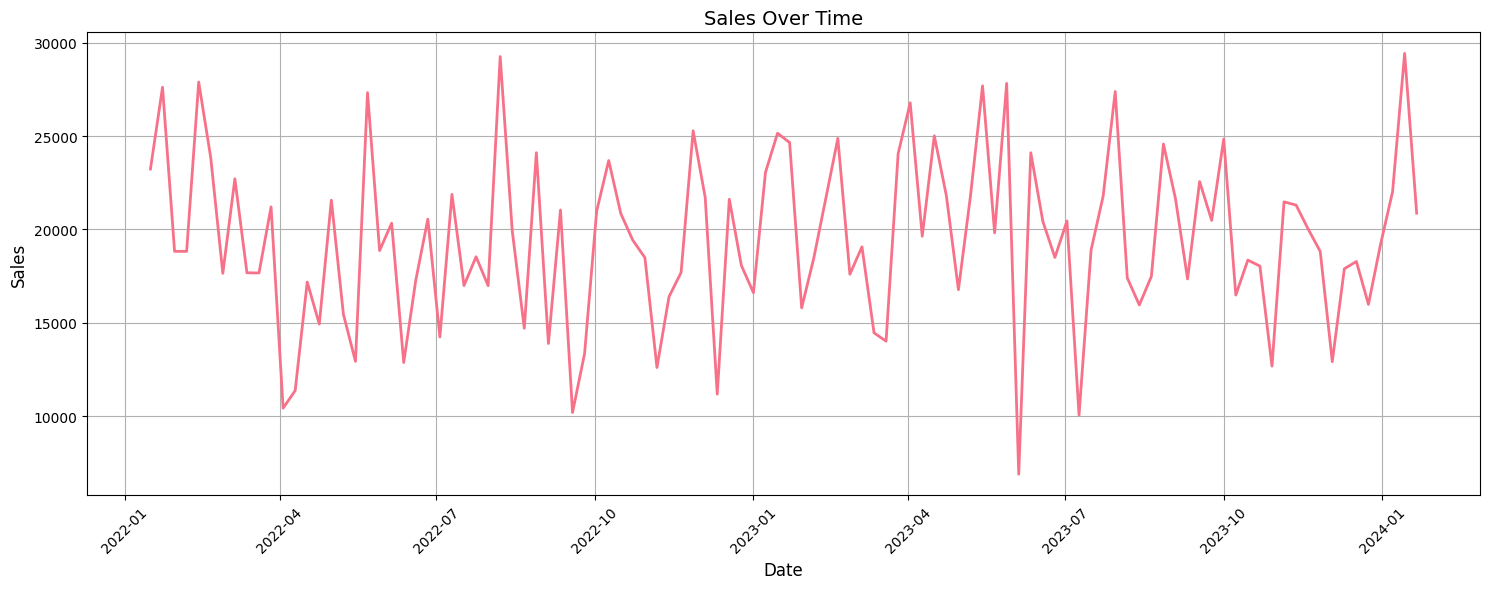

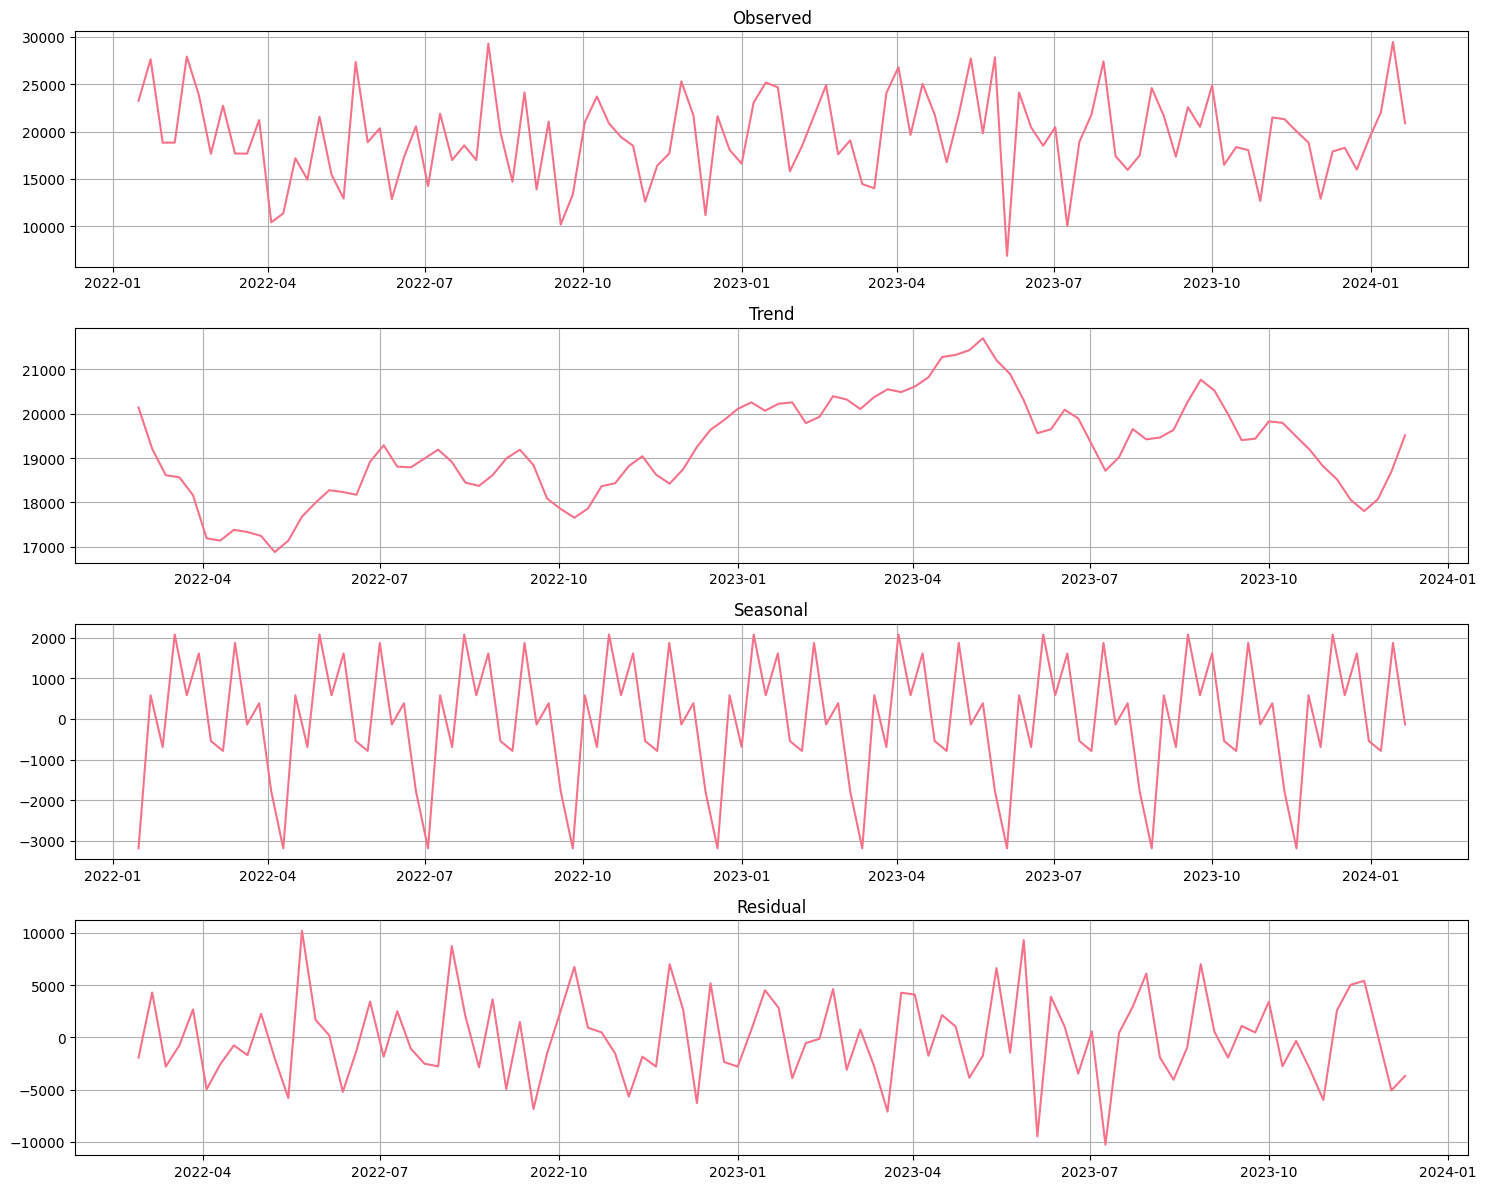

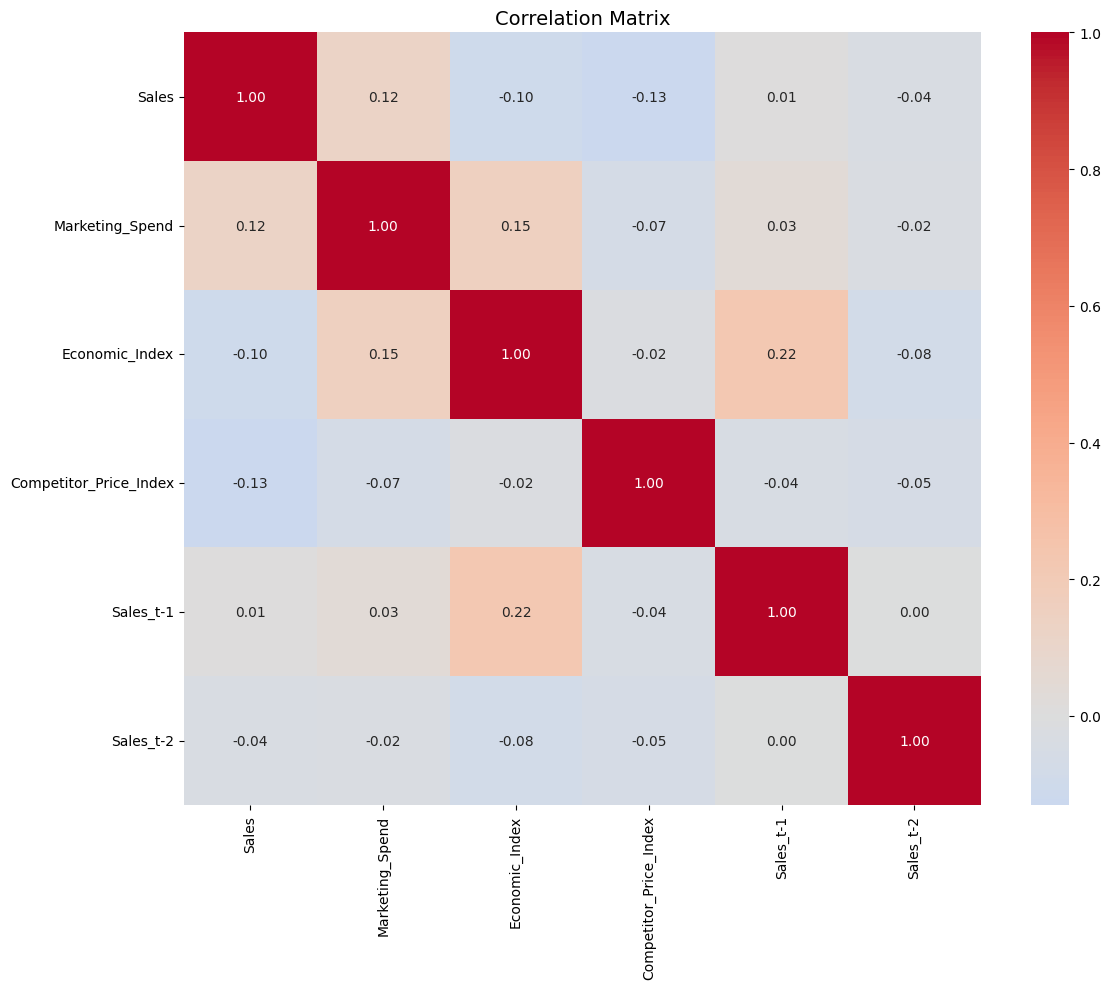


Correlations with Sales:
Sales                     1.000000
Marketing_Spend           0.119471
Sales_t-1                 0.007583
Sales_t-2                -0.037324
Economic_Index           -0.100855
Competitor_Price_Index   -0.130242
Name: Sales, dtype: float64


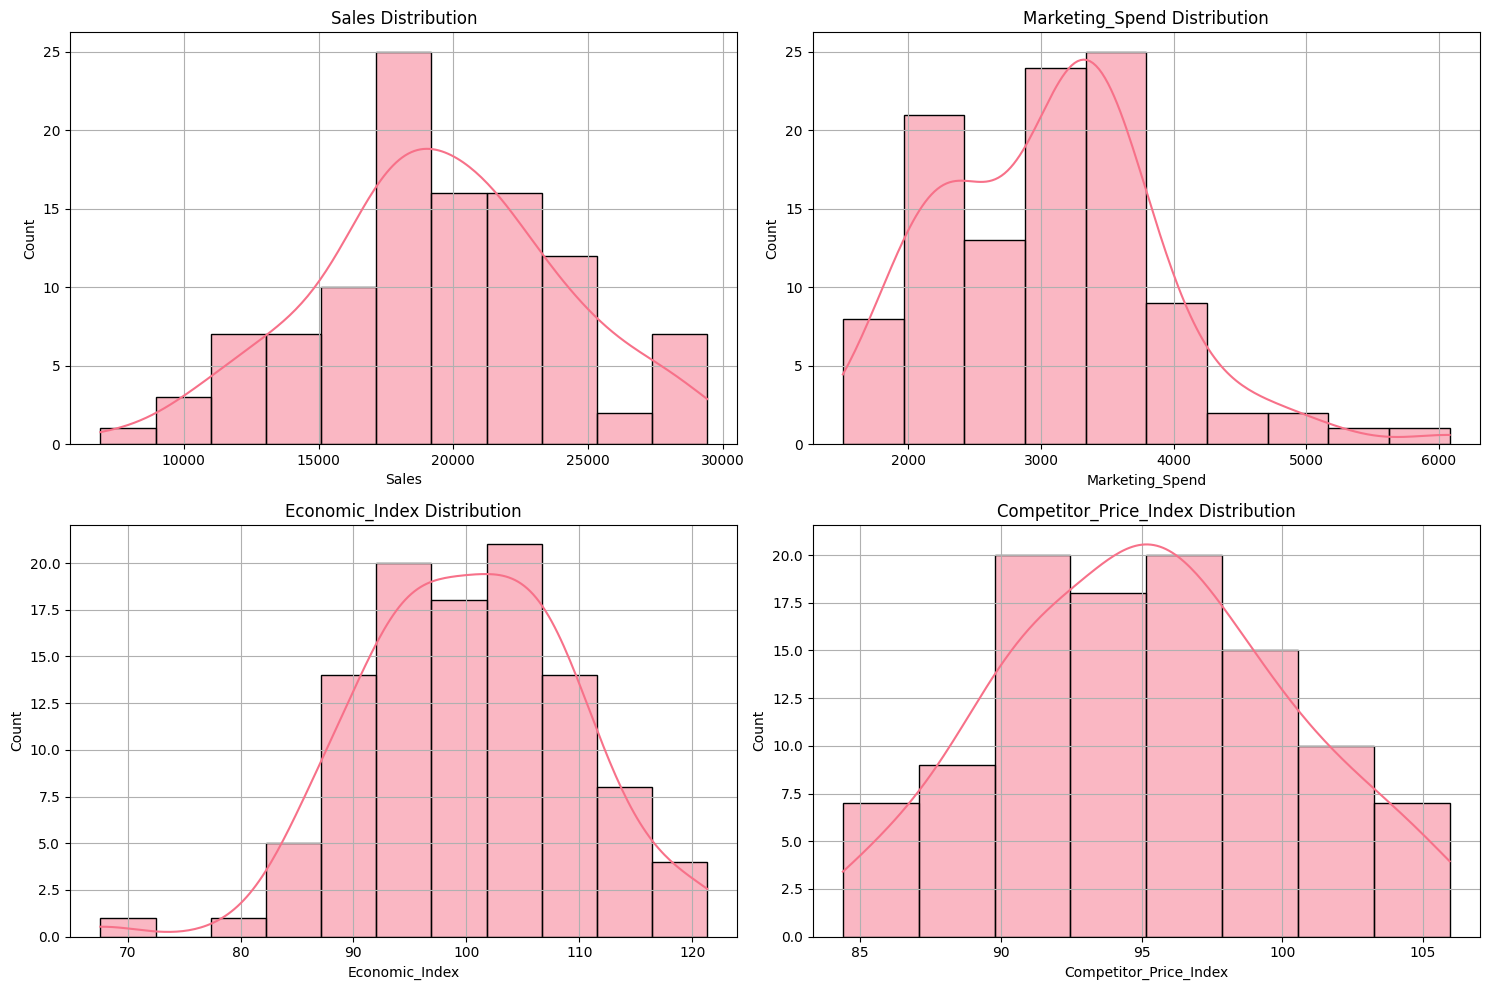

2025-04-22 01:55:55,978 - INFO - Data split at 2023-08-27 00:00:00
2025-04-22 01:55:55,979 - INFO - Training samples: 84
2025-04-22 01:55:55,979 - INFO - Testing samples: 22
2025-04-22 01:55:55,980 - INFO - Training SARIMAX model with order (1, 1, 1) and seasonal_order (1, 1, 1, 12)


Training samples: 84
Testing samples: 22


2025-04-22 01:55:56,444 - INFO - Model trained successfully!
2025-04-22 01:55:56,446 - INFO - Making predictions for 30 periods ahead
2025-04-22 01:55:56,813 - INFO - Predictions generated successfully


Model Performance Metrics:
MAE: 5530.85
RMSE: 6795.03
MAPE: 30.37%
R²: -2.32


Future Sales Forecast:
         Date  Forecasted Sales
0  2024-01-28           8222.66
1  2024-02-04          19256.13
2  2024-02-11          18315.73
3  2024-02-18          14097.99
4  2024-02-25          16951.00
5  2024-03-03          17116.63
6  2024-03-10          15788.84
7  2024-03-17          16487.68
8  2024-03-24          16655.46
9  2024-03-31          16256.42
10 2024-04-07          16415.50
11 2024-04-14          16495.48
12 2024-04-21          16380.40
13 2024-04-28          16412.64
14 2024-05-05          16443.61
15 2024-05-12          16411.72
16 2024-05-19          16416.85
17 2024-05-26          16427.64
18 2024-06-02          16419.17
19 2024-06-09          16419.43
20 2024-06-16          16422.94
21 2024-06-23          16420.79
22 2024-06-30          16420.52
23 2024-07-07          16421.60
24 2024-07-14          16421.09
25 2024-07-21          16420.92
26 2024-07-28          16421.24
27 2024-08-04          16421.13
28 2024-08-11          16421.06
29 2024-08-18    

In [4]:
# Sales Forecasting Analysis

# 1. Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import plotly.graph_objects as go
from statsmodels.tsa.seasonal import seasonal_decompose
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette('husl')

# Custom Sales Forecast Model (Assume this exists in another file as per original code)
from sales_forecast_model import SalesForecastModel

# 2. Load and Prepare Data
file_path = "c:/Users/nayan/Downloads/sales_train_with_lags_clean.csv"
model = SalesForecastModel()
model.load_data(file_path)
print("Data loaded successfully!")

# 3. Data Summary and Initial Analysis
print("First few rows of the data:")
print(model.data.head())

print("Basic statistics:")
print(model.data.describe())

print("Missing values:")
print(model.data.isnull().sum())

# 4. Time Series Visualization
plt.figure(figsize=(15, 6))
plt.plot(model.data.index, model.data['Sales'], linewidth=2)
plt.title('Sales Over Time', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 5. Seasonal Decomposition Analysis
decomposition = seasonal_decompose(model.data['Sales'], period=12)
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(15, 12))
ax1.plot(decomposition.observed)
ax1.set_title('Observed')
ax1.grid(True)
ax2.plot(decomposition.trend)
ax2.set_title('Trend')
ax2.grid(True)
ax3.plot(decomposition.seasonal)
ax3.set_title('Seasonal')
ax3.grid(True)
ax4.plot(decomposition.resid)
ax4.set_title('Residual')
ax4.grid(True)
plt.tight_layout()
plt.show()

# 6. Correlation Analysis
correlation_matrix = model.data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Matrix', fontsize=14)
plt.tight_layout()
plt.show()

print("\nCorrelations with Sales:")
print(correlation_matrix['Sales'].sort_values(ascending=False))

# 7. Feature Distributions
features = ['Sales', 'Marketing_Spend', 'Economic_Index', 'Competitor_Price_Index']
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.ravel()
for idx, feature in enumerate(features):
    sns.histplot(data=model.data, x=feature, kde=True, ax=axes[idx])
    axes[idx].set_title(f'{feature} Distribution', fontsize=12)
    axes[idx].grid(True)
plt.tight_layout()
plt.show()

# 8. Model Training and Evaluation
train_size = 0.8
forecast_periods = 30
seasonal_period = 12
model.split_data(train_size=train_size)
print(f"Training samples: {len(model.train_data)}")
print(f"Testing samples: {len(model.test_data)}")
model.train_model(order=(1, 1, 1), seasonal_order=(1, 1, 1, seasonal_period))

in_sample_pred, test_pred, future_pred = model.make_predictions(forecast_periods=forecast_periods)
mae = mean_absolute_error(model.test_data, test_pred)
rmse = np.sqrt(mean_squared_error(model.test_data, test_pred))
mape = np.mean(np.abs((model.test_data - test_pred) / model.test_data)) * 100
r2 = r2_score(model.test_data, test_pred)

print("Model Performance Metrics:")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape:.2f}%")
print(f"R²: {r2:.2f}")

# 9. Forecast Visualization
fig = go.Figure()
fig.add_trace(go.Scatter(x=model.train_data.index, y=model.train_data, mode='lines', name='Training Data'))
fig.add_trace(go.Scatter(x=model.test_data.index, y=model.test_data, mode='lines', name='Test Data'))
fig.add_trace(go.Scatter(x=test_pred.index, y=test_pred, mode='lines', name='Test Predictions'))
fig.add_trace(go.Scatter(x=future_pred.index, y=future_pred, mode='lines', line=dict(dash='dash'), name='Future Forecast'))
fig.update_layout(
    title='Sales Forecast Results',
    xaxis_title='Date',
    yaxis_title='Sales',
    hovermode='x unified',
    showlegend=True
)
fig.show()

# 10. Future Sales Forecast
forecast_df = pd.DataFrame({
    'Date': future_pred.index,
    'Forecasted Sales': future_pred.values.round(2)
})
print("Future Sales Forecast:")
print(forecast_df)
forecast_df.to_csv('sales_forecast_results.csv', index=False)
print("\nForecast results saved to 'sales_forecast_results.csv'")
